# Indicaciones

## A. Objetivos 

El objetivo es desarrollar y aplicar un modelo de regresión para predecir la temperatura de una ciudad europea, basándose en distintos parámetros climáticos.


## D. Librerías a utilizar

Las librerías y modelos son los siguientes:

In [627]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA


## E. Descripción del set de datos

El archivo CSV 'historia_climatica' contiene un resumen por hora y día para una ciudad europea. </p>

Los datos disponibles son: </p>

**Fecha:** Representa el momento en el que se tomó la muestra, con información sobre la fecha y la hora. </br>
**summary (resumen):** Descripción general del estado del tiempo en ese momento.</br>
**precipType (tipo de precipitación):** Indica el tipo de precipitación (por ejemplo, lluvia, nieve o granizo).</br>
**temperature (temperatura):** La temperatura en grados Celsius durante esa hora.</br>
**humidity (humedad):** Porcentaje de humedad en el ambiente.</br>
**windSpeed (velocidad del viento):** Velocidad del viento en ese momento, generalmente medida en kilómetros por hora (km/h) o metros por segundo (m/s).</br>
**windBearing (dirección del viento):** Dirección desde la cual sopla el viento, medida en grados desde el norte verdadero.</br>
**visibility (visibilidad):** La distancia horizontal a la cual se puede ver claramente un objeto, medida en kilómetros.</br>
**loudCover (cobertura de nubes):** Indica la proporción de cielo cubierto por nubes en ese momento, generalmente expresado como un porcentaje.</br>
**pressure (presión):** La presión atmosférica en ese momento, medida en hectopascales (hPa) o milibares (mbar).</br>
**dailySummary (resumen diario):** Descripción general del estado del tiempo durante el día.

In [628]:
df = pd.read_csv('./historia_climatica.csv')
df.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Fecha
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01 00:00:00
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01 01:00:00
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 02:00:00
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 03:00:00
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 04:00:00


# Parte I - Exploración de Datos

Para la creación de un modelo predictivo, el preprocesamiento es una de las partes más importantes del proceso, debido a que debemos asegurar la consistencia y la validez de los datos antes de entrenar un modelo. Datos faltantes o anomalos, pueden influir de forma evidente en el rendimiento de un modelo, por lo tanto la fase de exploración nos permitira comprender y arreglar nuestros datos antes de avanzar al entrenamiento y testeo.

"La exploración y el preprocesamiento de datos son pasos cruciales en el proceso de modelado predictivo, ya que permiten identificar patrones, detectar anomalías y preparar los datos para el análisis posterior" (Kuhn & Johnson, 2019, p. 27).

Lo primero que haremos es analizar los tipos de datos del dataset y las columnas disponibles.

In [629]:
df.info()
df['Fecha'] = pd.to_datetime(df['Fecha'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Summary                 96453 non-null  object 
 1   Precip Type             94981 non-null  object 
 2   Temperature (C)         96453 non-null  float64
 3   Humidity                96453 non-null  float64
 4   Wind Speed (km/h)       94352 non-null  float64
 5   Wind Bearing (degrees)  96453 non-null  float64
 6   Visibility (km)         96453 non-null  float64
 7   Loud Cover              96453 non-null  float64
 8   Pressure (millibars)    96281 non-null  float64
 9   Daily Summary           96453 non-null  object 
 10  Fecha                   96453 non-null  object 
dtypes: float64(7), object(4)
memory usage: 8.1+ MB


Como podemos observar, hay 96453 entradas y 11 columnas.

# I.A. Inspección y Gestión de Datos Faltantes

A la par de la exploración, debemos ir planificando la gestión de los datos faltantes a medida que vamos identificando errores en la consistencia.

"El manejo adecuado de los valores faltantes y anómalos es esencial para garantizar la calidad de los datos y evitar sesgos en el modelado predictivo" (Hastie et al., 2009, p. 28).

Se generan histogramas para visualizar la distribución de los datos para cada columna del detaset.

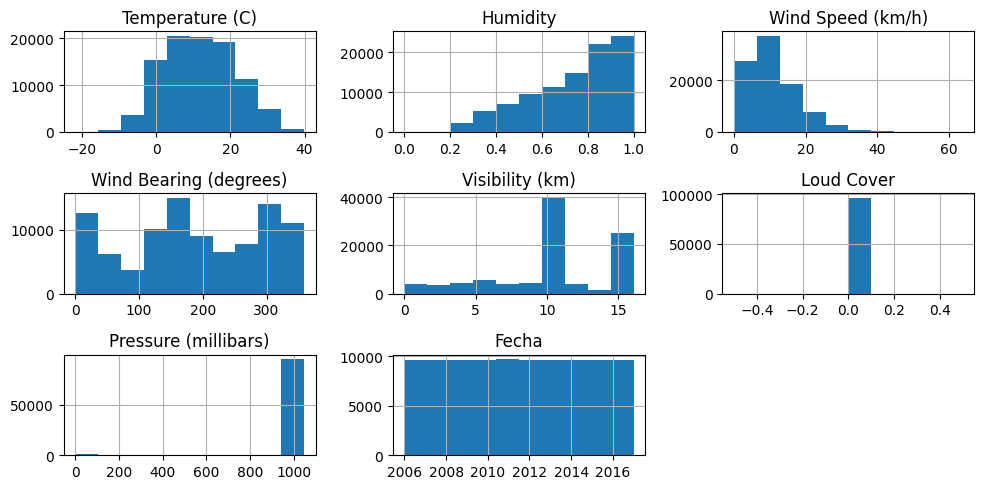

In [630]:
df.hist(figsize=(10, 5))
plt.tight_layout()
plt.show()

Procederemos a identificar y contar las filas duplicadas en el conjunto de datos. Mediante el uso del método `duplicated()`, determinaremos y cuantificaremos la presencia de filas duplicadas a lo largo de todas las columnas del DataFrame.

In [631]:
df.duplicated().sum()

23

`23` es aproximadamente el `0.02%` de las `96453` filas del total, por lo que procedemos a eliminarlas.

In [632]:
df = df.drop_duplicates()

Ahora, comprobaremos la cantidad de nulos en cada columna.

In [633]:
# Comprobando cantidad de nulos en cada columna
print(df.isnull().sum())

Summary                      0
Precip Type               1472
Temperature (C)              0
Humidity                     0
Wind Speed (km/h)         2101
Wind Bearing (degrees)       0
Visibility (km)              0
Loud Cover                   0
Pressure (millibars)       172
Daily Summary                0
Fecha                        0
dtype: int64


Para decidir que hacer con los datos faltantes primero debemos saber cual es la proporción de los datos que faltan con respecto del total de filas.


In [634]:
# Obtener la cantidad total de filas en el DataFrame
total_filas = df.shape[0]

# Calcular la cantidad de datos y la proporción de valores faltantes en cada columna
for columna in df.columns:
    cantidad_datos = df[columna].count()
    cantidad_faltantes = total_filas - cantidad_datos
    proporcion_faltantes = cantidad_faltantes / total_filas
    if cantidad_faltantes > 0:
      print(f"Columna: {columna}")
      print(f"Cantidad de datos: {cantidad_datos}")
      print(f"Cantidad de valores faltantes: {cantidad_faltantes}")
      print(f"Proporción de valores faltantes: {proporcion_faltantes:.2%}")
      print("---")

Columna: Precip Type
Cantidad de datos: 94958
Cantidad de valores faltantes: 1472
Proporción de valores faltantes: 1.53%
---
Columna: Wind Speed (km/h)
Cantidad de datos: 94329
Cantidad de valores faltantes: 2101
Proporción de valores faltantes: 2.18%
---
Columna: Pressure (millibars)
Cantidad de datos: 96258
Cantidad de valores faltantes: 172
Proporción de valores faltantes: 0.18%
---


Los datos faltantes representan una pequeña proporción del total (aprox. < `2.2%`), por lo que es viable imputarlos.

In [635]:
df.describe(include='object')

,Summary,Precip Type,Daily Summary
count,96430,94958,96430
unique,27,2,214
top,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,31726,84360,20085


Para la columna `Precip Type`, que es de tipo categórica, se imputarán los
valores faltantes con la moda. Podemos observar tiene solo dos valores únicos, siendo el valor más frecuente `rain`

In [636]:
df['Precip Type'] = df['Precip Type'].fillna(df['Precip Type'].mode()[0])

Se comprueban las consecuencias sobre el dataframe para verificar la cantidad de datos nulos.

In [637]:
df.describe(include='object')

,Summary,Precip Type,Daily Summary
count,96430,96430,96430
unique,27,2,214
top,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,31726,85832,20085


Para determinar si debemos utilizar la media o la mediana para imputar los valores faltantes en las columnas `Wind Speed (km/h)` y `Pressure (millibars)`, podemos analizar la distribución de los datos en cada columna

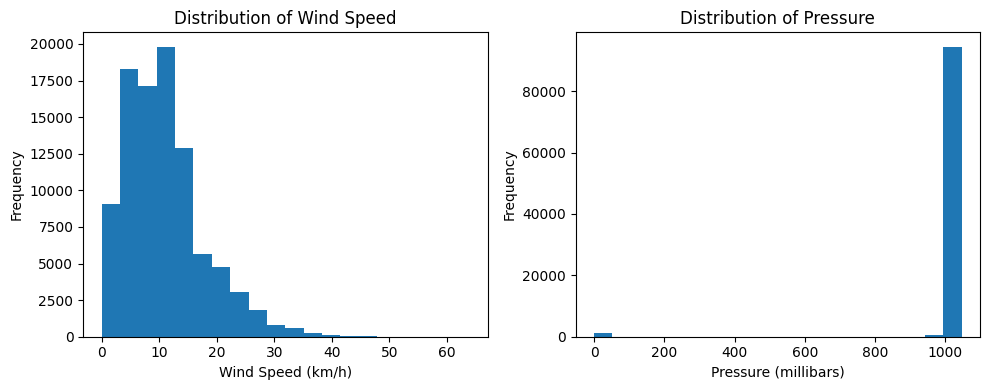

In [638]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(df['Wind Speed (km/h)'], bins=20)
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.title('Distribution of Wind Speed')

plt.subplot(1, 2, 2)
plt.hist(df['Pressure (millibars)'], bins=20)
plt.xlabel('Pressure (millibars)')
plt.ylabel('Frequency')
plt.title('Distribution of Pressure')

plt.tight_layout()
plt.show()

Se visualizan distribuciones direccionales sesgadas en ambos graficos, hacia la izquierda para `Wind Speed (km/h)` y hacia la derecha en `Pressure (millibars)`. Aunque para este último, pareciera ser que los datos cercanos al cero podrían tratarse de anomalías.

Obtenemos el sesgo de cada columna:

In [639]:
print(df.skew(numeric_only='true'))

Temperature (C)           0.094324
Humidity                 -0.716116
Wind Speed (km/h)         1.114704
Wind Bearing (degrees)   -0.154438
Visibility (km)          -0.498657
Loud Cover                0.000000
Pressure (millibars)     -8.420462
dtype: float64


El valor positivo y considerable (`1.11`) del sesgo para `Wind Speed (km/h)` y muy negativo (`-8.421509`) para `Pressure (millibars)`, confirma el sesgo hacia la izquierda y derecha respectivamente.

Para la columna `Wind Speed (km/h)`, utilizaremos la mediana para la imputación debido a la distribución sesgada hacia la derecha, de esta manera se evita que los valores anómalos tengan un impacto desproporcionado en la imputación.


In [640]:
df['Wind Speed (km/h)'].median()

9.9659

In [641]:
df['Wind Speed (km/h)'] = df['Wind Speed (km/h)'].fillna(df['Wind Speed (km/h)'].median())

Por otro lado, considerando la distribución de los datos para la columna `Pressure (millibars)`, también se imputará con la mediana.

In [642]:
df['Pressure (millibars)'].median()

1016.44

In [643]:
df['Pressure (millibars)'] = df['Pressure (millibars)'].fillna(df['Pressure (millibars)'].median())

Comprobamos nuevamente que no hayan datos faltantes.

In [644]:
print(df.isnull().sum())

Summary                   0
Precip Type               0
Temperature (C)           0
Humidity                  0
Wind Speed (km/h)         0
Wind Bearing (degrees)    0
Visibility (km)           0
Loud Cover                0
Pressure (millibars)      0
Daily Summary             0
Fecha                     0
dtype: int64


# I.B. Inspección y Gestión de Datos Anómalos

Antes, vamos a definir un par de funciones que permitirán eliminar y contar la cantidad de datos anómalos por cada columna.

In [645]:
import matplotlib.pyplot as plt
def graficar_outliers():
  df.boxplot(figsize=(18,8))


def obtener_outliers_de_columna(column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  print(f"Valores atípicos en {column}:", outliers[column].count())

def obtener_outliers_de_columnas():
  numeric_columns = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
                   'Visibility (km)', 'Pressure (millibars)']
  for column in numeric_columns:
    obtener_outliers_de_columna(column)

def quitar_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  return df_filtered

def reemplazar_outliers(df, column, value):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
  df.loc[~df.index.isin(df_filtered.index), column] = value
  return df

Crearemos un gráfico de caja (*box plot*) para cada columna numérica identificada.

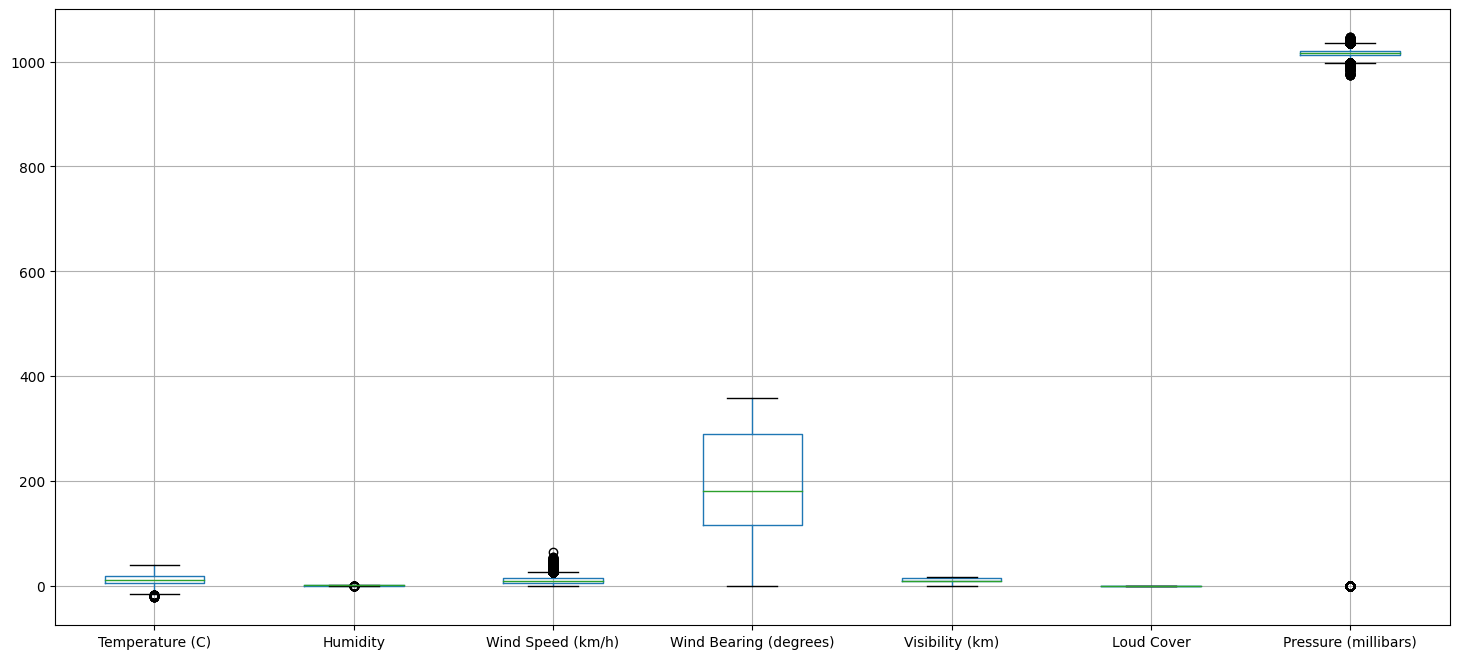

In [646]:
graficar_outliers()

Para ser más precisos y complementar lo que observamos en los gráficos de caja con bigotes, calcularemos estadísticos descriptivos como la media, mediana, desviación estándar y cuartiles:


In [647]:
df.describe()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96430.000000,96430.000000,96430.000000,96430.000000,96430.000000,96430.0,96430.000000
mean,11.929757,0.734904,10.795655,187.498579,10.347273,0.0,1003.251981
std,9.550464,0.195466,6.839067,107.376383,4.192552,0.0,116.893743
min,-21.822222,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.683333,0.600000,5.989200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.440000
75%,18.838889,0.890000,14.039200,290.000000,14.812000,0.0,1021.080000
max,39.905556,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


Con esta información podemos deducir que la columna `Loud Cover` no aporta información. Por este motivo, la descartamos para evaluaciones posteriores.

In [648]:
df = df.drop('Loud Cover', axis=1)

Para el resto de cada columna numérica, identificaremos los valores atípicos utilizando el **rango intercuartil** (IQR).


In [649]:
obtener_outliers_de_columnas()

Valores atípicos en Temperature (C): 44
Valores atípicos en Humidity: 46
Valores atípicos en Wind Speed (km/h): 3210
Valores atípicos en Wind Bearing (degrees): 0
Valores atípicos en Visibility (km): 0
Valores atípicos en Pressure (millibars): 4402


**Outliers de `Pressure (millibars)`**

Reemplazaremos los valores  `0.00`  de `Pressure (millibars)` con la mediana. Probablemente son errores en el dispositivo sensor.

In [650]:
# Rellenar valores de 0.00 en la columna "Pressure (millibars)" con la mediana
median_pressure = df['Pressure (millibars)'].median()
median_wind_speed = df['Wind Speed (km/h)'].median()
df = reemplazar_outliers(df, "Pressure (millibars)", median_pressure)
df = reemplazar_outliers(df, "Wind Speed (km/h)", median_wind_speed)
obtener_outliers_de_columnas()

Valores atípicos en Temperature (C): 44
Valores atípicos en Humidity: 46
Valores atípicos en Wind Speed (km/h): 1209
Valores atípicos en Wind Bearing (degrees): 0
Valores atípicos en Visibility (km): 0
Valores atípicos en Pressure (millibars): 1704


**Outliers de `Humidity`**

Como se trata de una cantidad mínima de valores de `Humidity` con outliers, solo los eliminaremos.

In [651]:
# Eliminar outliers
df = quitar_outliers(df, "Humidity")

**Outliers y corrección de sesgo de `Wind Speed (km/h)`**

Teniendo en cuenta la ausencia de valores negativos en la columna `Wind Speed (km/h)` aplicaremos la transformación logarítmica para manejar los valores atípicos y mejorar la distribución de los datos.

In [652]:
#df = df.copy()
df['Wind Speed (km/h)'] = np.log1p(df['Wind Speed (km/h)'])
#df['Humidity'] = np.exp(df['Humidity'])
#df['Visibility (km)'] = np.exp(df['Visibility (km)'])

<ipython-input-652-9adedfc9af40>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Wind Speed (km/h)'] = np.log1p(df['Wind Speed (km/h)'])


**Outliers y corrección de sesgo de `Humidity`**

Dado que el sesgo de `Humidity` se encuentra hacia la derecha, se aplica la transformación exponencial para corregirla.

In [653]:
df['Humidity'] = np.exp(df['Humidity'])

<ipython-input-653-ce3b14f43e58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Humidity'] = np.exp(df['Humidity'])


**Outliers y corrección de sesgo de `Visibility (km)`**

A pesar de que el sesgo `Visibility (km)` se encuentra hacia la derecha, no se observan cambios aparentes al aplicar la función exponencial. Por lo tanto, se descarta.

Ahora, visualizaremos nuevamente los gráficos de caja con bigotes para dimensionar los cambios aplicados sobre los datos anómalos.

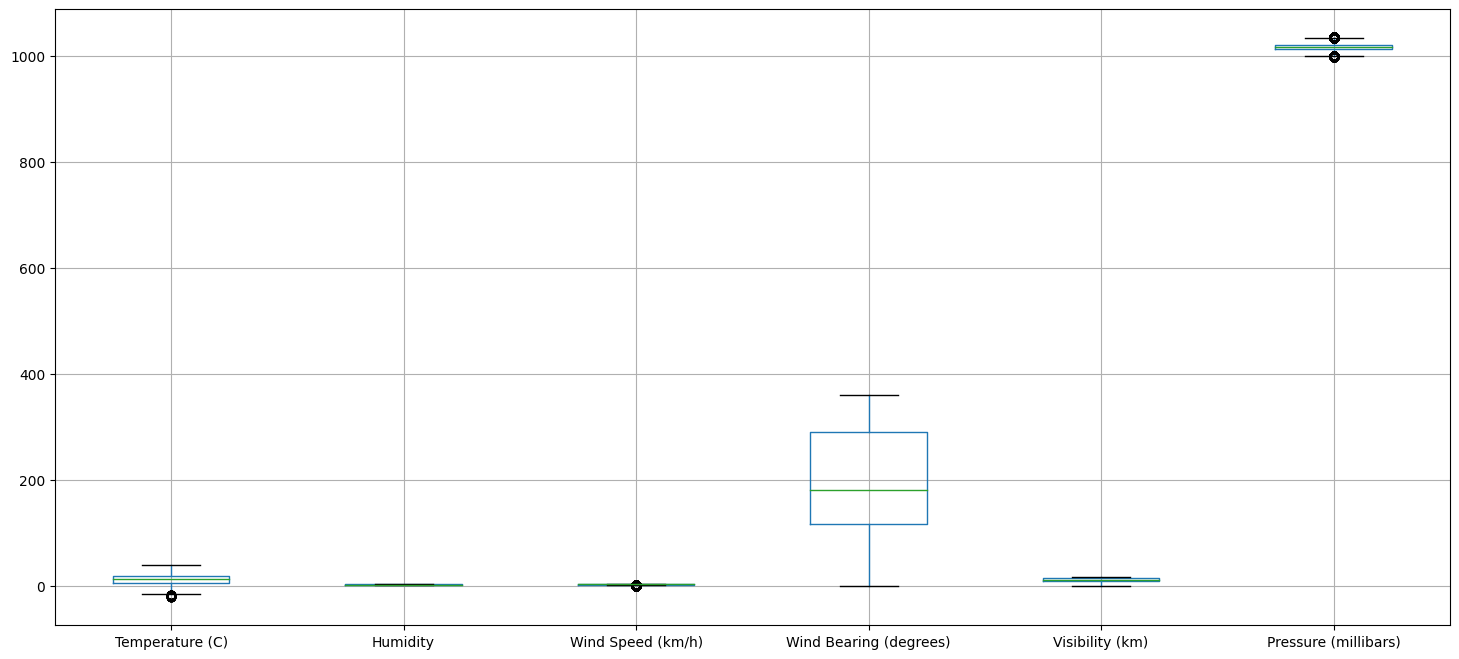

In [654]:
graficar_outliers()

# I.C. Inspección y Gestión de Datos Categóricos

"La codificación de variables categóricas es un paso fundamental en el preprocesamiento de datos para el modelado predictivo, ya que permite representar información no numérica de manera que los algoritmos de aprendizaje automático puedan procesarla eficientemente" (Geron, 2019, p. 101).

"La selección de características categóricas relevantes puede tener un impacto significativo en el rendimiento del modelo y debe realizarse de manera cuidadosa, considerando tanto la información que aportan las variables como la complejidad del modelo resultante" (Zheng & Casari, 2018, p. 73).

In [655]:
# Obtener todas las columnas con valores numéricos
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

df.select_dtypes(include=['object'])

,Summary,Precip Type,Daily Summary
0,Partly Cloudy,rain,Partly cloudy throughout the day.
1,Partly Cloudy,rain,Partly cloudy throughout the day.
2,Mostly Cloudy,rain,Partly cloudy throughout the day.
3,Partly Cloudy,rain,Partly cloudy throughout the day.
4,Mostly Cloudy,rain,Partly cloudy throughout the day.
...,...,...,...
96448,Partly Cloudy,rain,Partly cloudy starting in the morning.
96449,Partly Cloudy,rain,Partly cloudy starting in the morning.
96450,Partly Cloudy,rain,Partly cloudy starting in the morning.
96451,Partly Cloudy,rain,Partly cloudy starting in the morning.




*   La variable `Summary` proporciona información relevante sobre las condiciones climáticas generales en un momento dado. Al incluirla como variable dummy, podemos capturar la relación entre diferentes estados climáticos y la temperatura.
*   La variable `Precip Type` indica el tipo específico de precipitación, como lluvia, nieve o granizo. Diferentes tipos de precipitación pueden tener un efecto distinto en la temperatura. Al incluir esta variable como variables dummies, podemos capturar la relación entre el tipo de precipitación y la temperatura


Hemos decidido excluir la variable `Daily Summary` del modelo porque consideramos que puede introducir redundancia al proporcionar información similar a la variable `Summary`, pero a un nivel de agregación diario. A continuación se muestran los dinstintos valores de la variable `Summary`.

In [656]:
df["Summary"].value_counts()

Partly Cloudy                          31713
Mostly Cloudy                          28092
Overcast                               16591
Clear                                  10866
Foggy                                   7140
Breezy and Overcast                      527
Breezy and Mostly Cloudy                 515
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     82
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Breezy and Foggy                          35
Windy and Mostly Cloudy                   35
Dry                                       31
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [657]:
df['Precip Type'].unique()

array(['rain', 'snow'], dtype=object)

In [658]:
# Seleccionar las variables categóricas para la codificación de variables dummies
categorical_vars = ['Summary', 'Precip Type']

In [659]:
# Aplicar la codificación de variables dummies a las variables categóricas seleccionadas
dummy_vars = pd.get_dummies(df[categorical_vars])

In [660]:
# Concatenar las variables dummies con el DataFrame original
df = pd.concat([df, dummy_vars], axis=1)

In [661]:
# Excluir las variables categóricas originales
df = df.drop(['Summary', 'Daily Summary', 'Precip Type'], axis=1)

Comprobando columnas luego de transformación a *dummies*. Se ha creado una columna por cada valor distinto de `Summary` y `Precip Type`

In [662]:
df.columns

Index(['Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Fecha', 'Summary_Breezy', 'Summary_Breezy and Dry',
       'Summary_Breezy and Foggy', 'Summary_Breezy and Mostly Cloudy',
       'Summary_Breezy and Overcast', 'Summary_Breezy and Partly Cloudy',
       'Summary_Clear', 'Summary_Dangerously Windy and Partly Cloudy',
       'Summary_Drizzle', 'Summary_Dry', 'Summary_Dry and Mostly Cloudy',
       'Summary_Dry and Partly Cloudy', 'Summary_Foggy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast',
       'Summary_Humid and Partly Cloudy', 'Summary_Light Rain',
       'Summary_Mostly Cloudy', 'Summary_Overcast', 'Summary_Partly Cloudy',
       'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry',
       'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy',
       'Precip Type_rain', 'Precip Type

# II.A. Selección de Variables

"La transformación de variables y la selección de características son técnicas que permiten mejorar la calidad de los datos y reducir la dimensionalidad del problema, lo que puede conducir a modelos más precisos y eficientes" (James et al., 2021, p. 127).

Para respaldar nuestra selección de variables, procederemos a construir una matriz de correlación. Basaremos nuestra decisión en los coeficientes de correlación de las distintas columnas en relación con la temperatura. De esta manera, evaluaremos la relación entre cada variable y la temperatura para fundamentar nuestra elección de las variables a incluir en el análisis.

In [663]:
corr_matrix = df.corr()
df.corr()

<ipython-input-663-d7adbf8d2eaa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()
<ipython-input-663-d7adbf8d2eaa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,...,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Precip Type_rain,Precip Type_snow
Temperature (C),1.000000,-0.626493,0.040212,0.029345,0.393055,-0.284374,-0.009952,0.003100,-0.024860,-0.006314,...,0.300188,-0.001960,-0.004897,0.005164,-0.000037,-0.000193,-0.009059,-0.005428,0.558789,-0.558789
Humidity,-0.626493,1.000000,-0.221523,-0.000501,-0.404716,0.035090,-0.013050,-0.006894,0.021418,-0.039799,...,-0.310982,0.011967,-0.008101,-0.007108,0.005726,-0.014081,-0.002648,-0.028265,-0.238871,0.238871
Wind Speed (km/h),0.040212,-0.221523,1.000000,0.111627,0.102122,-0.178352,0.005625,0.000765,0.004528,0.017413,...,-0.021441,-0.006703,0.002165,0.000765,0.001531,0.004528,0.005135,0.006266,0.068870,-0.068870
Wind Bearing (degrees),0.029345,-0.000501,0.111627,1.000000,0.047573,-0.078525,0.010033,0.001574,-0.004773,0.027689,...,0.017375,0.002304,0.011220,-0.001126,-0.001951,0.013120,0.011432,0.026431,0.041125,-0.041125
Visibility (km),0.393055,-0.404716,0.102122,0.047573,1.000000,-0.138864,-0.004354,-0.000281,-0.039668,0.019800,...,0.244633,-0.020819,0.000792,-0.000281,-0.012975,0.003689,-0.002793,0.007147,0.310187,-0.310187
Pressure (millibars),-0.284374,0.035090,-0.178352,-0.078525,-0.138864,1.000000,-0.003527,0.002397,-0.011657,-0.047383,...,0.020774,0.001012,0.000141,0.001718,-0.004543,-0.011327,-0.024305,-0.006188,-0.229624,0.229624
Summary_Breezy,-0.009952,-0.013050,0.005625,0.010033,-0.004354,-0.003527,1.000000,-0.000076,-0.000451,-0.001735,...,-0.016580,-0.000241,-0.000216,-0.000076,-0.000153,-0.000451,-0.000512,-0.000624,-0.008519,0.008519
Summary_Breezy and Dry,0.003100,-0.006894,0.000765,0.001574,-0.000281,0.002397,-0.000076,1.000000,-0.000061,-0.000236,...,-0.002256,-0.000033,-0.000029,-0.000010,-0.000021,-0.000061,-0.000070,-0.000085,0.001131,-0.001131
Summary_Breezy and Foggy,-0.024860,0.021418,0.004528,-0.004773,-0.039668,-0.011657,-0.000451,-0.000061,1.000000,-0.001397,...,-0.013347,-0.000194,-0.000174,-0.000061,-0.000123,-0.000363,-0.000412,-0.000503,-0.040346,0.040346
Summary_Breezy and Mostly Cloudy,-0.006314,-0.039799,0.017413,0.027689,0.019800,-0.047383,-0.001735,-0.000236,-0.001397,1.000000,...,-0.051325,-0.000747,-0.000668,-0.000236,-0.000472,-0.001397,-0.001584,-0.001933,0.013896,-0.013896


Visualizaremos estos datos con un mapa de calor a modo de obtener una visión general y, humanamente, más comprensible de la incidencia de las columnas en el valor de la temperatura.

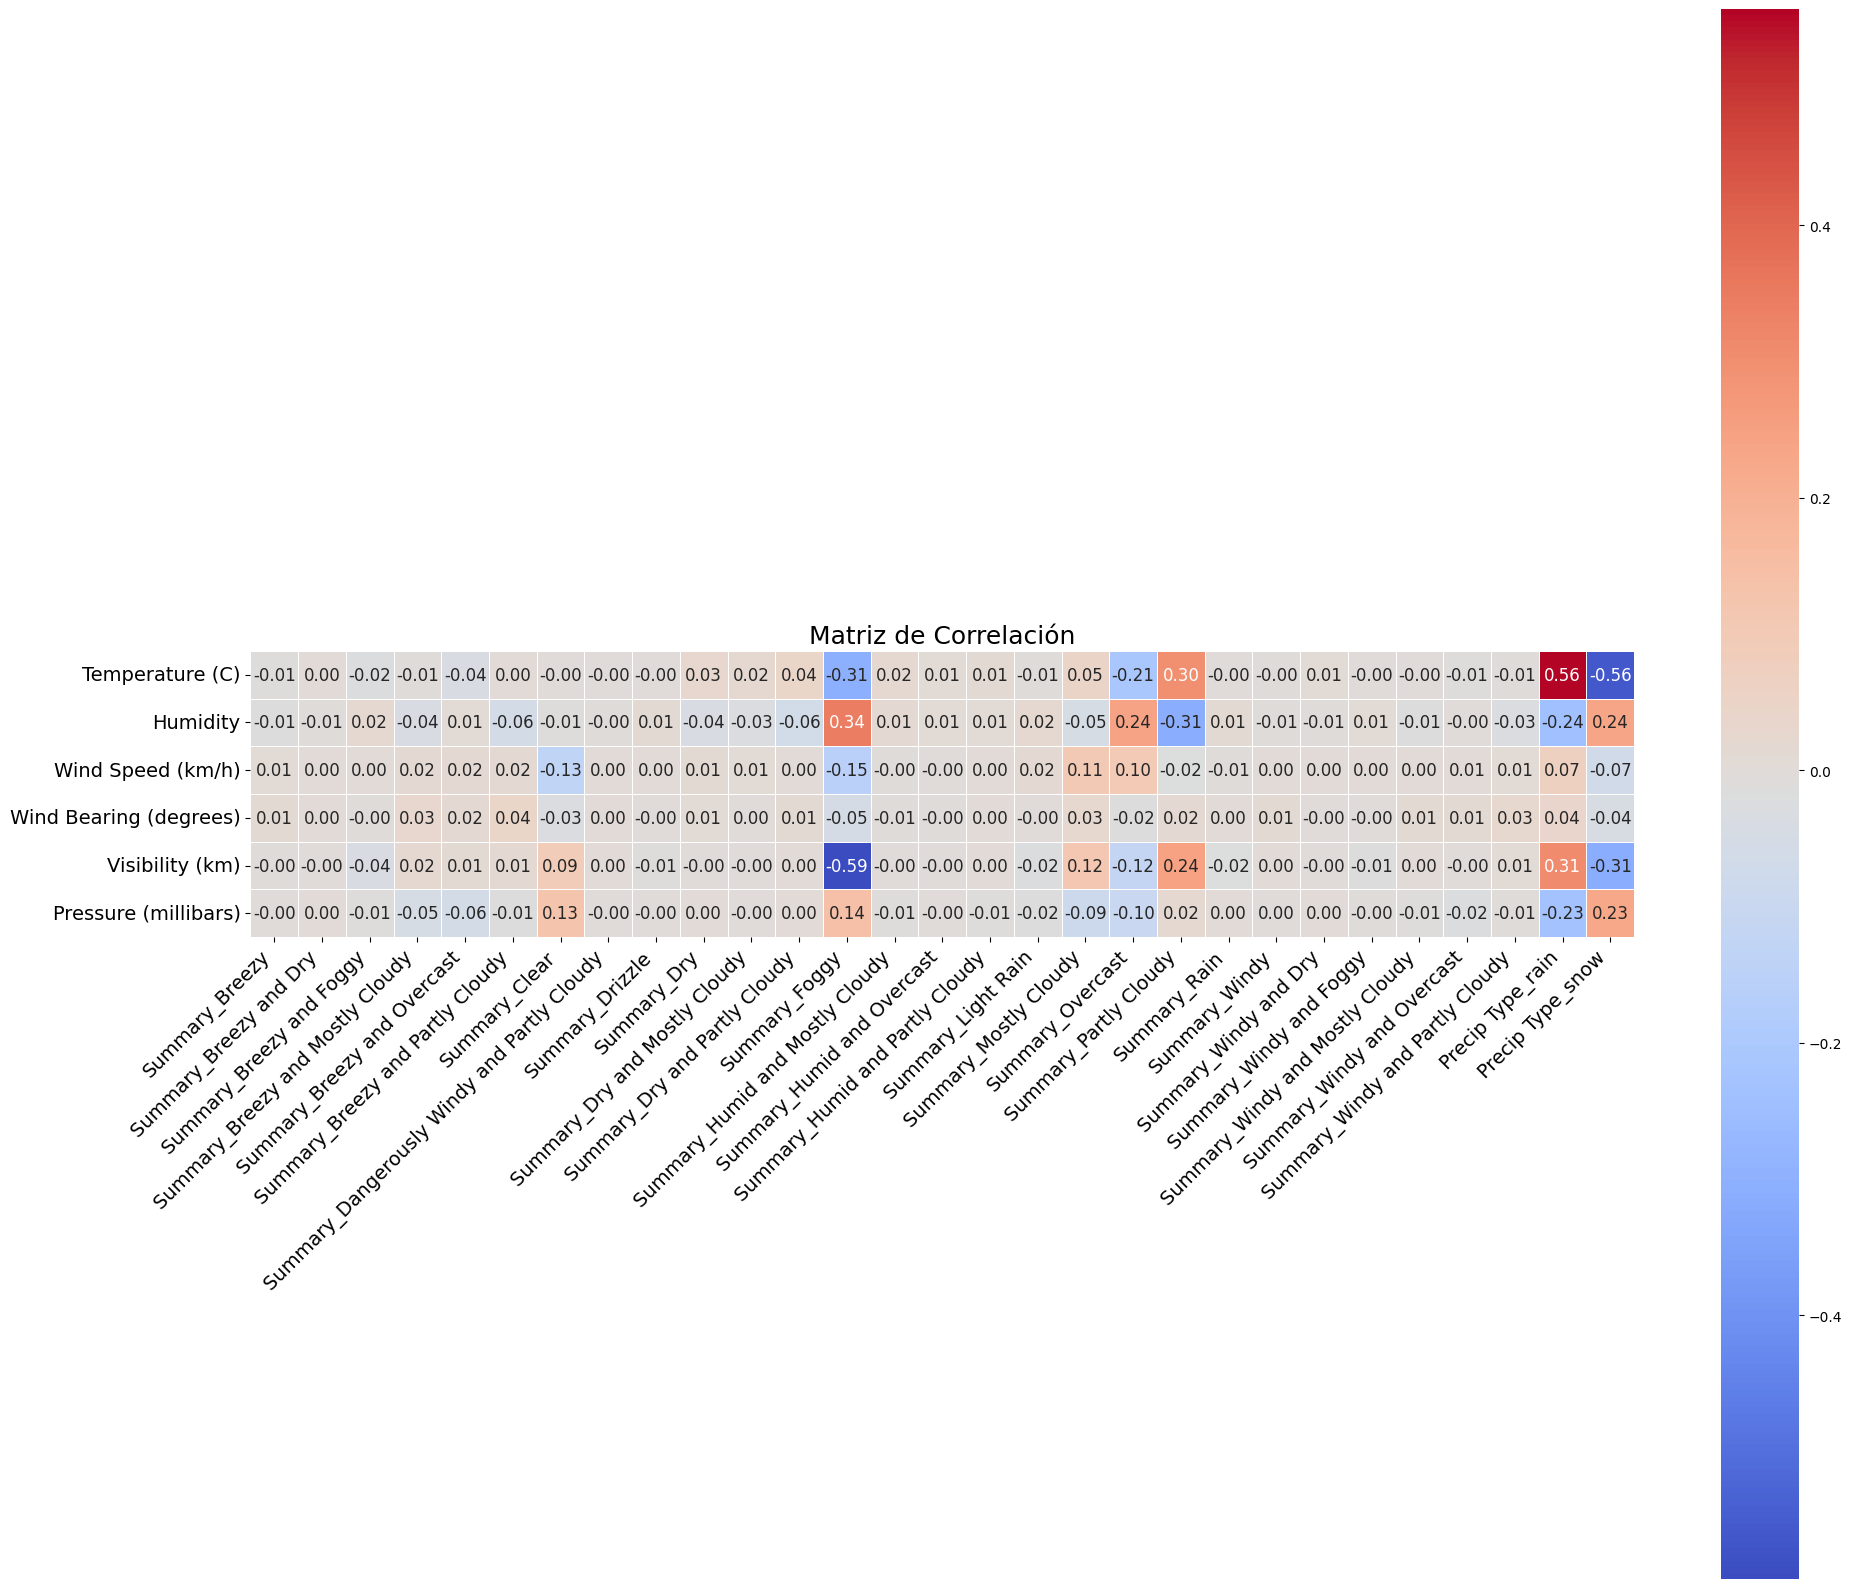

In [664]:
# Crear una figura y ejes para el gráfico con un tamaño más grande
fig, ax = plt.subplots(figsize=(20, 16))

# Obtener todas las columnas dummies
summary_cols = [col for col in corr_matrix.columns if col.startswith('Summary') or col.startswith('Precip')]

# Filtrar filas y columnas de la matriz de correlación
filtered_correlations = corr_matrix.loc[numerical_cols, summary_cols]

# Crear el heatmap de la matriz de correlación con etiquetas más grandes
sns.heatmap(filtered_correlations, annot=True, cmap='coolwarm', ax=ax, annot_kws={"size": 12}, fmt='.2f', linewidths=0.5, square=True)

# Configurar el título y ajustar el diseño
plt.title('Matriz de Correlación', fontsize=18)
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Vamos a eliminar la mayoría de las variables `dummies` que tienen correlaciones muy débiles o nulas con la temperatura, ya que es poco probable que aporten información significativa al modelo de regresión. Esto incluye variables como `Summary_Breezy and Dry`, `Summary_Breezy and Foggy`, `Summary_Dry`, `Summary_Windy`, etc. Utilizaremos un coeficiente de 0.1 para discriminar. Esto es, si el coeficiente de la columna con la fila de temperatura es menor a 0.1, entonces se descarta y no se incluye.

In [665]:
relevant_correlation_coef = 0.1

# 1. Filter for columns starting with 'Summary' or 'Precip'
summary_or_precip_cols = [col for col in corr_matrix.columns if (col.startswith('Summary') or (col.startswith('Precip')))]

# 2. Extract correlations with the 'Temp' column
temp_correlations = corr_matrix['Temperature (C)'][summary_or_precip_cols]

# 3. Filter for correlations greater than 0.1
columns_with_strong_corr_to_temp = temp_correlations[abs(temp_correlations) > relevant_correlation_coef]

# 4. Display the results
print(columns_with_strong_corr_to_temp)

Summary_Foggy           -0.309855
Summary_Overcast        -0.210681
Summary_Partly Cloudy    0.300188
Precip Type_rain         0.558789
Precip Type_snow        -0.558789
Name: Temperature (C), dtype: float64


Como consecuencia, las variables *dummies* con correlaciones ligeramente más fuertes, como `Summary_Foggy`, `Summary_Overcast` y `Summary_Partly Cloudy`, serán incluidas ya que podrían capturar algunos patrones climáticos relevantes para la temperatura.

In [666]:
col_names_with_strong_corr_to_temp = [index for index in columns_with_strong_corr_to_temp.index]
numerical_col_names = numerical_cols.tolist()

# Lista de variables dummies a mantener
cols_to_keep = col_names_with_strong_corr_to_temp + numerical_col_names + ['Fecha']

# Obtener las columnas del df
columns_in_df = df.columns

# Lista de variables dummies a eliminar
dummies_to_drop = [col for col in columns_in_df if col not in cols_to_keep]

# Eliminar las variables dummies seleccionadas del DataFrame
df = df.drop(columns=dummies_to_drop)

Ahora, se puede observar que nuestro dataframe solo contiene aquellas columnas *dummies* que tienen una correlación considerable con la columna de temperatura.

<ipython-input-667-b26a614976a8>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=ax, annot_kws={"size": 12}, fmt='.2f', linewidths=0.5, square=True)


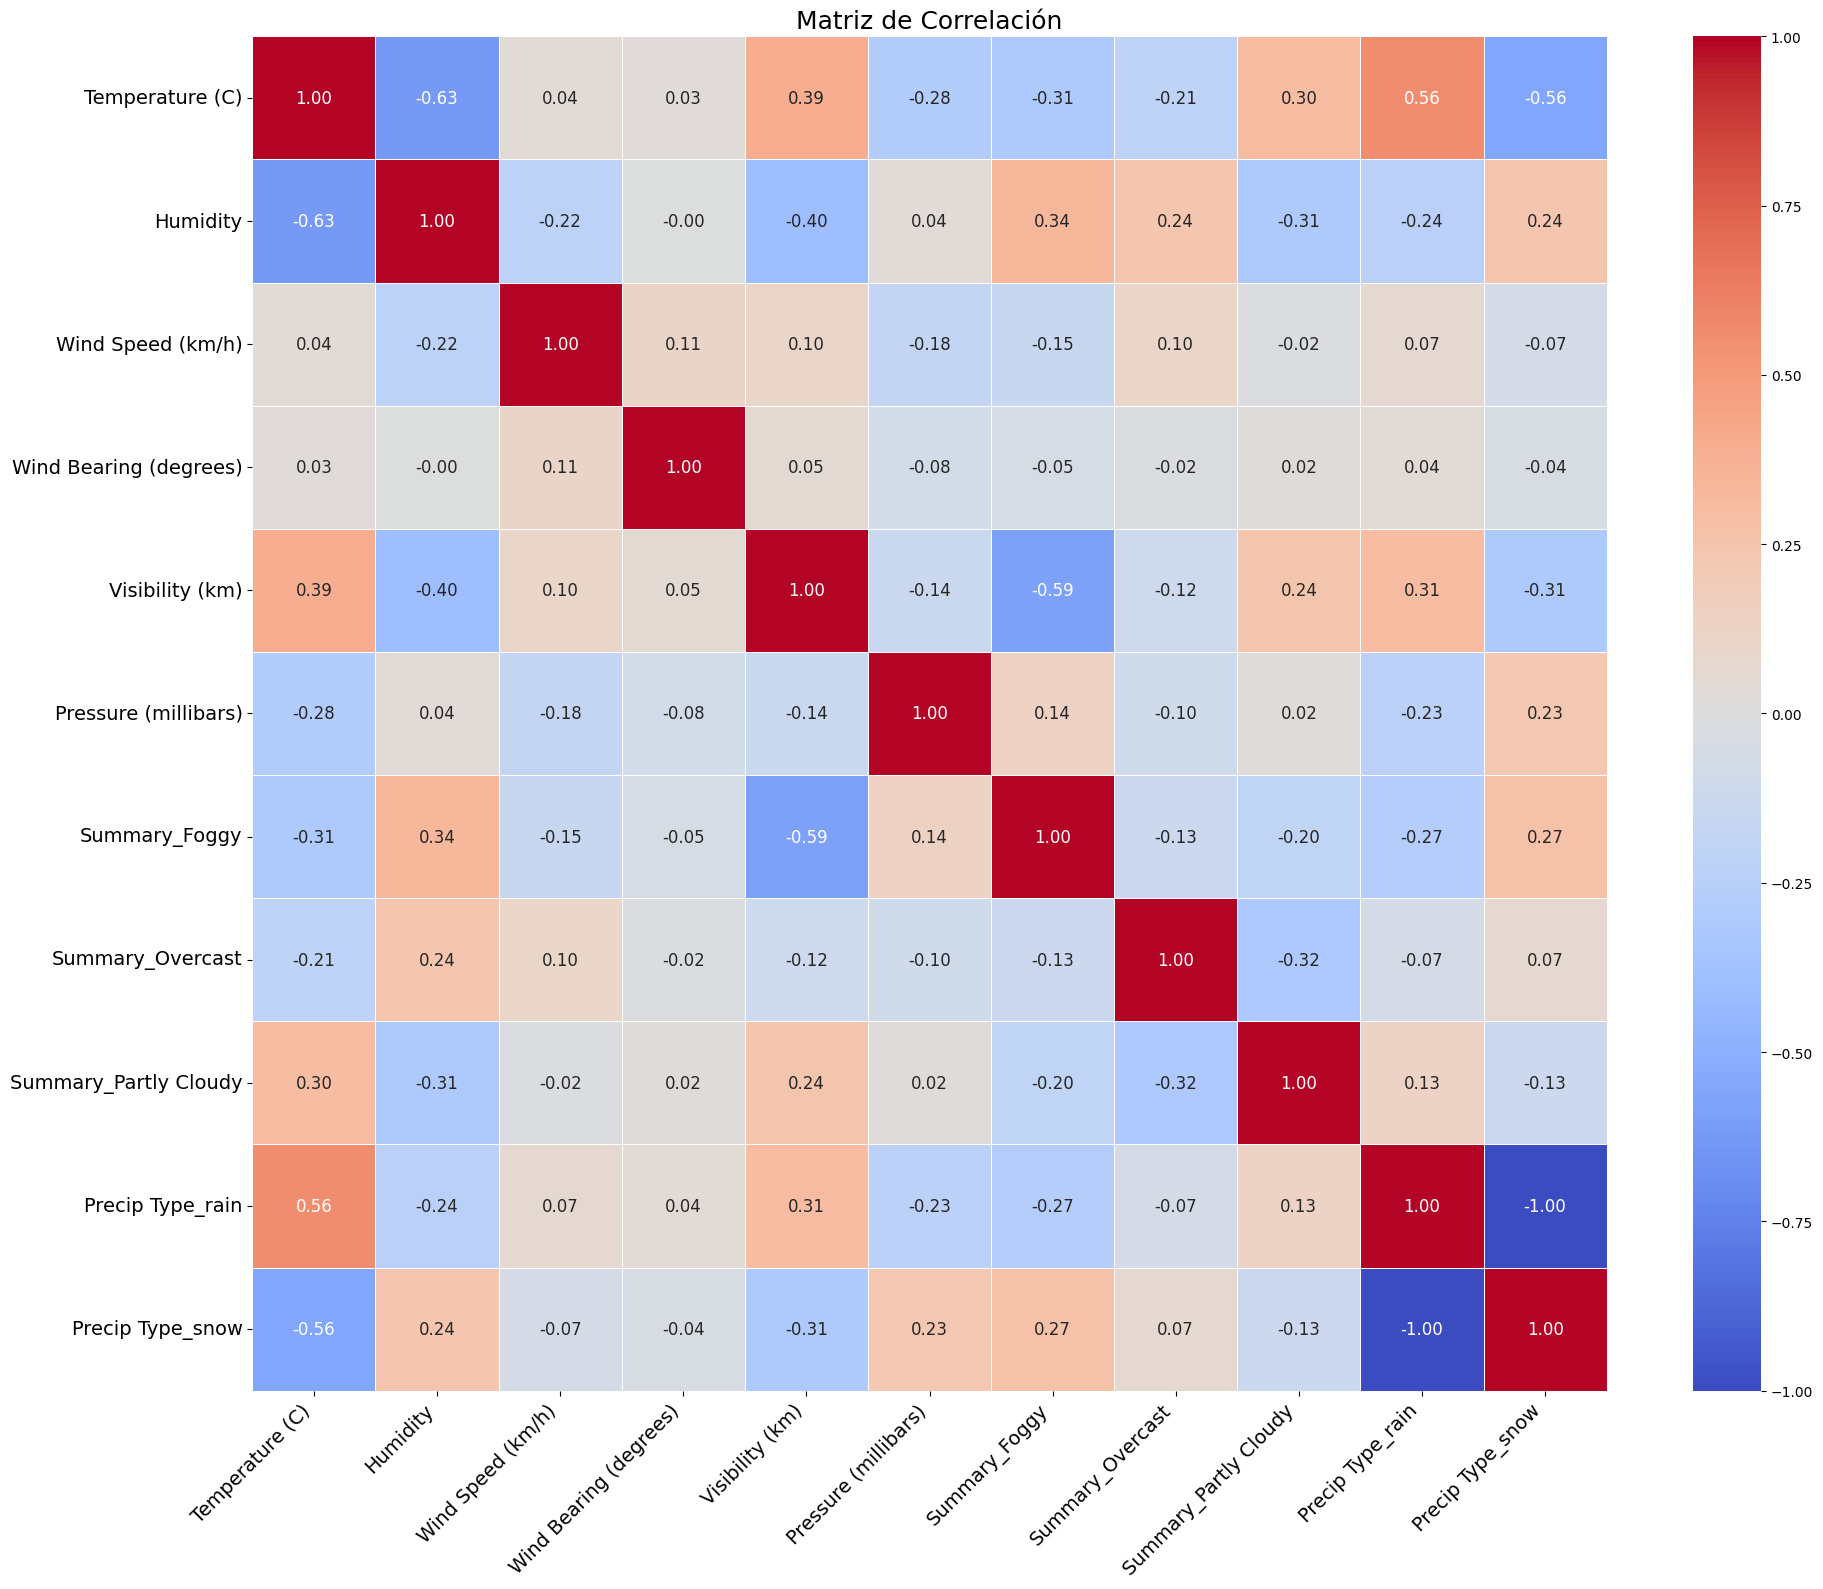

In [667]:
# Crear una figura y ejes para el gráfico con un tamaño más grande
fig, ax = plt.subplots(figsize=(20, 16))

# Crear el heatmap de la matriz de correlación con etiquetas más grandes
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=ax, annot_kws={"size": 12}, fmt='.2f', linewidths=0.5, square=True)

# Configurar el título y ajustar el diseño
plt.title('Matriz de Correlación', fontsize=18)
plt.xticks(fontsize=14, rotation=45, ha='right')
plt.yticks(fontsize=14)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# II.B. Creación de Variables Temporales

En el análisis de datos, frecuentemente manipulamos variables relacionadas con el tiempo como años, meses, días, u horas. Para ello vamos a extraer estos componentes temporales desde la columna fecha del *DataFrame* utilizando la función `pd.to_datetime()`. Una vez ejectutada, podemos extraer el año, mes, día, y hora de cada muestra.

**Extraer año**

```python
df['Fecha'].dt.year
```

**Extraer mes**

```python
df['Fecha'].dt.month
```

**Extraer día**

```python
df['Fecha'].dt.day
```

**Extraer hora**

```python
df['Fecha'].dt.hour
```

## Decisión sobre incluir nuevos atributos temporales

Para mejorar el modelo de predicción, es importante saber qué datos de tiempo (como año, mes, día y hora) realmente ayudan a entender mejor las variaciones de temperatura.

### Sobre el año
El año puede capturar tendencias o patrones a largo plazo en la temperatura, como las condiciones meteorológicas del Efecto del Niño o del Efecto de la Niña.

**Decisión**: Incluir `Year` como variable numérica en el modelo.

### Sobre el mes
El mes puede capturar patrones estacionales en la temperatura.

**Decisión**: Incluir `Month` como variable categórica en el modelo, transformándola en variables *dummies*.

### Sobre el día del mes
La influencia del día del mes en la temperatura no es significativa por sí misma. Sin patrones claros que relacionen días específicos del mes con cambios en la temperatura, su contribución al modelo podría ser irrelevante.

**Decisión**: Excluir `Day` del modelo.

### Sobre la hora (hour)*
La variación de la temperatura a lo largo del día puede ser capturada a través de la hora, reflejando las fluctuaciones diurnas.
Se observan cambios notables en la temperatura, siendo más frescas durante la noche y más cálidas a lo largo del día.

**Decisión**: Incluir `Hour` como variable numérica en el modelo.

Luego de un proceso de experimentación, pudimos determinar que transformar las columnas temporales a valores *dummies* contribuye significativamente a la precisión del modelo.

In [668]:
# Convertir la columna 'Fecha' a un formato de tiempo de pandas
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Extraer componentes temporales
df['Year'] = df['Fecha'].dt.year.astype("int64")
df['Month'] = df['Fecha'].dt.month.astype("int64")
df['Day'] = df['Fecha'].dt.day.astype("int64")
df['Hour'] = df['Fecha'].dt.hour.astype("int64")

df = df.drop(['Day'], axis=1)
df = df.drop(['Fecha'], axis=1)

# Transformar las variables temporales a variables dummy
df = pd.get_dummies(df, columns=['Year', 'Month', 'Hour'])


# III. Desarrolle y Evalúe un Modelo de Regresión

"La regresión lineal es una técnica ampliamente utilizada para modelar la relación entre una variable dependiente y una o más variables independientes" (Montgomery et al., 2012, p. 68).

Aquí ya podemos separar nuestra data de entrenamiento y nuestra data de prueba.

In [669]:
original_df = df.copy()

column_to_predict = df['Temperature (C)']
df = df.drop(['Temperature (C)'], axis='columns')

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(df, column_to_predict, test_size=0.2, random_state=56)

X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

# Escalar datos
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Una vez escaladoslos datos de entrenamientos y de prueba, procedemos a crear el modelo de regresión lineal.

In [670]:
# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Imprimir las métricas de evaluación
print("Métricas de evaluación:")
print(f"Error absoluto medio (MAE): {mae:.2f} grados Celsius")
print(f"Coeficiente de determinación (R2): {r2:.2f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse:.2f} grados Celsius")

Métricas de evaluación:
Error absoluto medio (MAE): 2.73 grados Celsius
Coeficiente de determinación (R2): 0.87
Raíz del error cuadrático medio (RMSE): 3.41 grados Celsius


"La evaluación del modelo utilizando métricas como el MAE, el R² y la RMSE permite cuantificar el rendimiento del modelo y comparar diferentes enfoques de modelado" (Chai & Draxler, 2014, p. 1247).

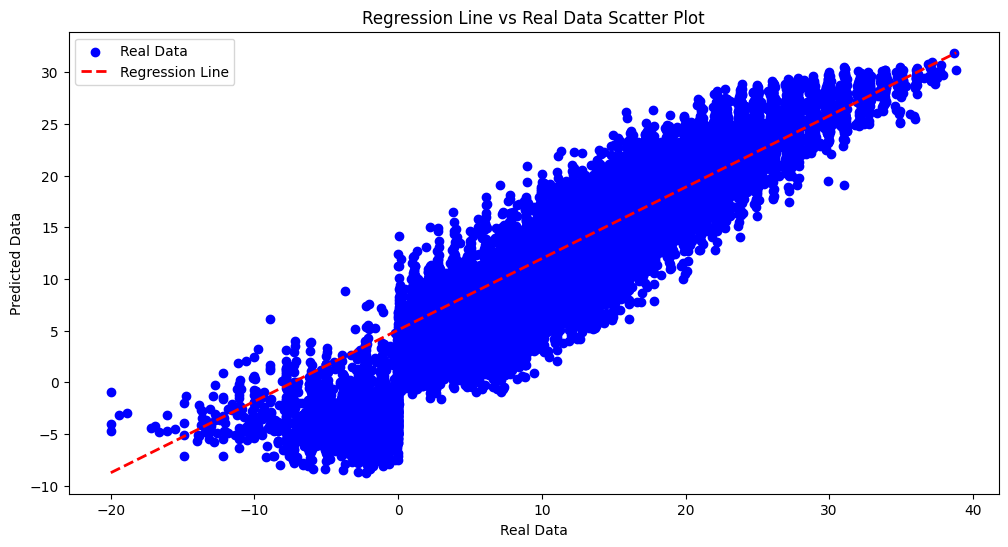

In [671]:
# Crear un nuevo gráfico para mostrar la aproximación de la regresión lineal y los datos reales dispersos
plt.figure(figsize=(12, 6))

# Graficar los datos reales dispersos
plt.scatter(y_test, y_pred, color='blue', label='Real Data')

# Graficar la línea de aproximación de la regresión lineal
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], color='red', linestyle='--', linewidth=2, label='Regression Line')

# Agregar etiquetas y título al gráfico
plt.xlabel('Real Data')
plt.ylabel('Predicted Data')
plt.title('Regression Line vs Real Data Scatter Plot')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

# Bibliografía


1. Chai, T., & Draxler, R. R. (2014). Root mean square error (RMSE) or mean absolute error (MAE)?–Arguments against avoiding RMSE in the literature. *Geoscientific Model Development, 7*(3), 1247-1250. [DOI: 10.5194/gmd-7-1247-2014](https://doi.org/10.5194/gmd-7-1247-2014)

2. Hastie, T., Tibshirani, R., & Friedman, J. (2009). *The elements of statistical learning: Data mining, inference, and prediction.* Springer.

3. James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021). *An introduction to statistical learning: With applications in R.* Springer.

4. Kuhn, M., & Johnson, K. (2019). *Feature engineering and selection: A practical approach for predictive models.* CRC Press.

5. Montgomery, D. C., Peck, E. A., & Vining, G. G. (2012). *Introduction to linear regression analysis.* John Wiley & Sons.

6. Geron, A. (2019). *Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems.* O'Reilly Media.

7. Zheng, A., & Casari, A. (2018). *Feature engineering for machine learning: Principles and techniques for data scientists.* O'Reilly Media.